### Importing Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading dataset into pandas dataframe

In [2]:
df_org = pd.read_csv("cars_ds_final.csv", index_col = 0)

In [3]:
# Making copy of dataframe in case we need to restore the original one.
df = df_org.copy()

### Univariate Analysis

#### **1. Understand Dataset:** Get a sense of the dataset structure, including the number of rows and columns.

In [4]:
# First five Entries of dataset
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Last five Entries of dataset
df.tail()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1275,Mitsubishi,Montero,3.2 At,"Rs. 68,62,560",3200 cc,4.0,4.0,AWD (All Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking Number of rows and columns in dataset
df.shape

(1276, 140)

- Our dataset contain 1276 rows and 141 columns

#### **2. Data Cleaning:** Handle missing values, if any, by either removing or imputing them based on the nature of the data.

In [7]:
#Checking if there are any null values in dataset
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [8]:
# Data Cleaning

# 1. Handling missing values
# Example: Dropping columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# 2. Data type conversion
# Converting 'Ex-Showroom_Price' to numeric after removing 'Rs.' and ','
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].replace({'Rs. ': '', ',': ''}, regex=True)
df['Ex-Showroom_Price'] = pd.to_numeric(df['Ex-Showroom_Price'], errors='coerce')

# Converting 'Displacement' to numeric after removing 'cc'
df['Displacement'] = df['Displacement'].str.replace(' cc', '')
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')

# 3. Standardizing values
# Example: Standardizing the 'Make' column to have consistent capitalization
df['Make'] = df['Make'].str.title()

# 4. Handling duplicate rows
df = df.drop_duplicates()

# 5. Normalizing text data
# Example: Standardizing the 'Model' column to have consistent capitalization
df['Model'] = df['Model'].str.title()

# 6. Filling null values in the cleaned dataset
# Different strategies can be used for different types of columns

# For numerical columns, we can fill null values with the mean or median of the column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns, we can fill null values with the mode (most frequent value) of the column
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Displaying the cleaned dataset
df.head()


<ipython-input-8-029b10846326>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].replace({'Rs. ': '', ',': ''}, regex=True)
<ipython-input-8-029b10846326>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ex-Showroom_Price'] = pd.to_numeric(df['Ex-Showroom_Price'], errors='coerce')
<ipython-input-8-029b10846326>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Key_Off_Reminder,USB_Compatibility,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,Turbocharger
0,Tata,Nano Genx,Xt,292667,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes
1,Tata,Nano Genx,Xe,236447,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes
2,Tata,Nano Genx,Emax Xm,296661,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes
3,Tata,Nano Genx,Xta,334768,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes
4,Tata,Nano Genx,Xm,272223,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes


In [9]:
df.shape

(1267, 97)

In [10]:
#Checking if still any null
df.isnull().sum()

Make                      0
Model                     0
Variant                   0
Ex-Showroom_Price         0
Displacement              0
                         ..
Seat_Height_Adjustment    0
Navigation_System         0
Second_Row_AC_Vents       0
Rear_Center_Armrest       0
Turbocharger              0
Length: 97, dtype: int64

In [11]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm', 'Engine_Location',
       'Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Length',
       'Width', 'Body_Type', 'Doors', 'City_Mileage', 'ARAI_Certified_Mileage',
       'Kerb_Weight', 'Gears', 'Ground_Clearance', 'Front_Brakes',
       'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension',
       'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Power_Steering',
       'Power_Windows', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Seating_Capacity',
       'Seats_Material', 'Type', 'Wheelbase', 'Wheels_Size',
       '12v_Power_Outlet', 'Audiosystem', 'Aux-in_Compatibility',
       'Average_Fuel_Consumption', 'Basic_Warranty', 'Bluetooth',
       'Boot-lid_Opener', 'Boot_Space', 'CD_/_MP3_/_DVD_Player',
       'Central_Locking', 'Child_Safety_Locks', 'Clock

#### **3. Data Types:** Check the data types of each column. Ensure they are appropriate for the analysis.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 0 to 1275
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Make                                       1267 non-null   object 
 1   Model                                      1267 non-null   object 
 2   Variant                                    1267 non-null   object 
 3   Ex-Showroom_Price                          1267 non-null   int64  
 4   Displacement                               1267 non-null   float64
 5   Cylinders                                  1267 non-null   float64
 6   Valves_Per_Cylinder                        1267 non-null   float64
 7   Drivetrain                                 1267 non-null   object 
 8   Cylinder_Configuration                     1267 non-null   object 
 9   Emission_Norm                              1267 non-null   object 
 10  Engine_Location         

#### **4. Descriptive Statistics:** Calculate basic descriptive statistics such as mean, median, mode, minimum, maximum, and standard deviation for numeric columns.

In [13]:
# Setting the pandas option to display float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [14]:
df.describe()

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
count,1267.00,1267.00,1267.00,1267.00,1267.00,1267.00,1267.00
mean,4617330.30,1853.10,4.36,3.98,4.55,5.26,3.59
std,12187926.66,1062.12,1.63,0.80,0.75,1.14,2.45
min,236447.00,72.00,2.00,1.00,2.00,2.00,1.00
25%,740553.50,1198.00,4.00,4.00,4.00,5.00,2.00
50%,1055000.00,1497.00,4.00,4.00,5.00,5.00,2.00
75%,2991400.00,1998.00,4.00,4.00,5.00,5.00,6.00
max,212155397.00,7993.00,16.00,16.00,5.00,16.00,14.00


#### **5. Histograms:** Create histograms to visualize the distribution of key numeric variables (e.g., sales, price).


In [15]:
# We have already stored numerical columns in a variable named numerical_cols
numerical_cols

Index(['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
       'Doors', 'Seating_Capacity', 'Number_of_Airbags'],
      dtype='object')

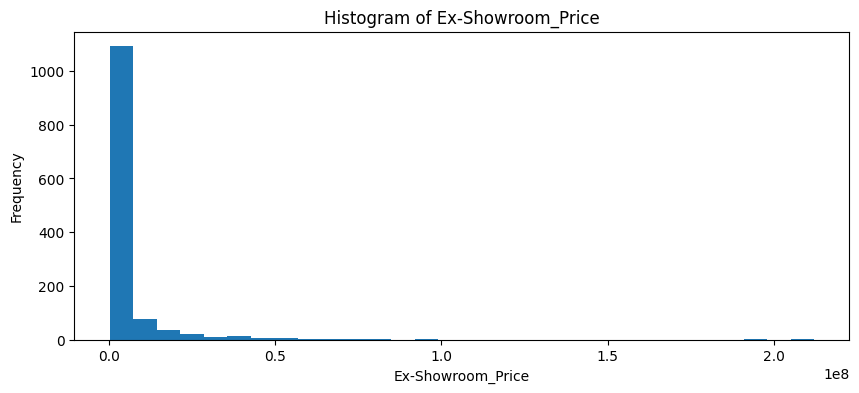

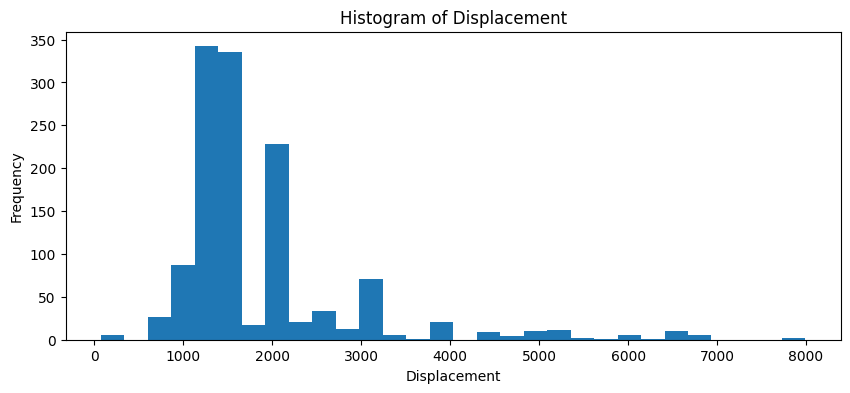

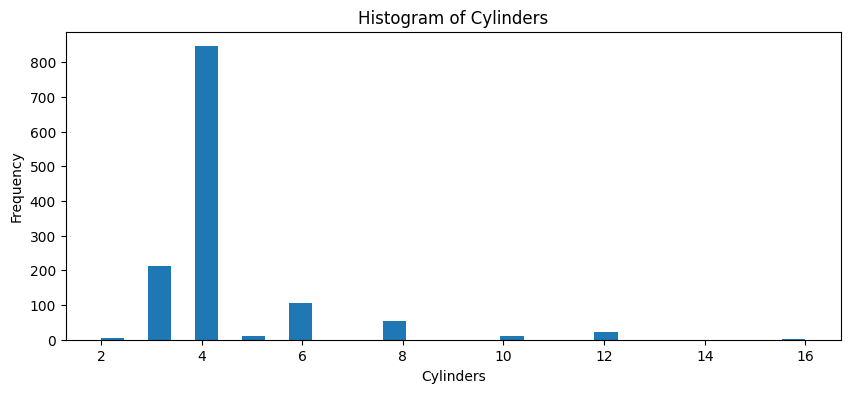

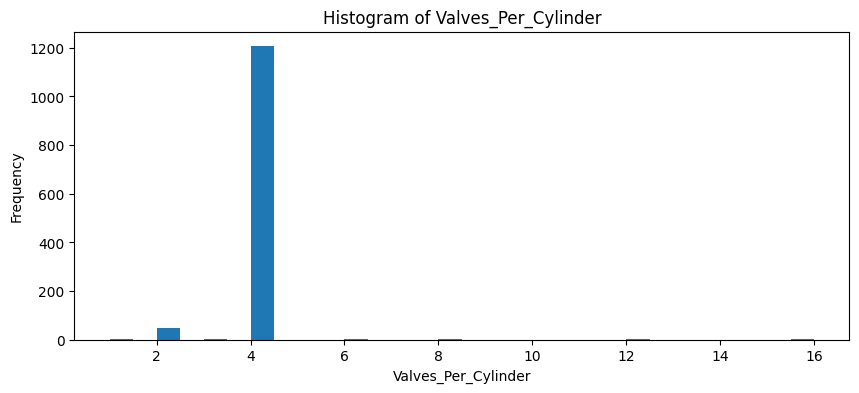

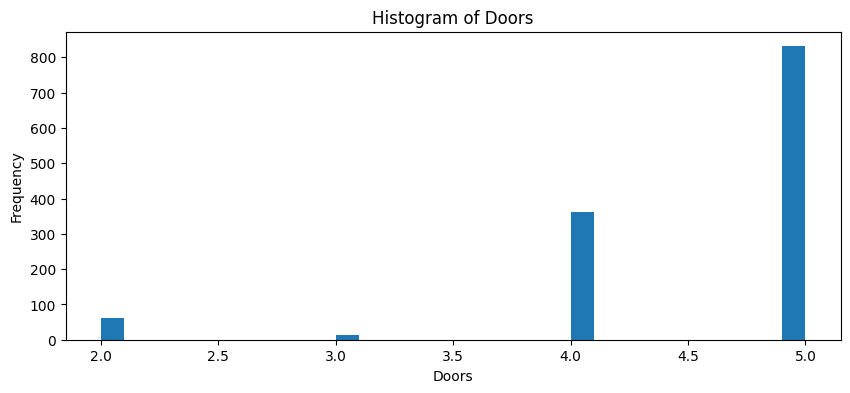

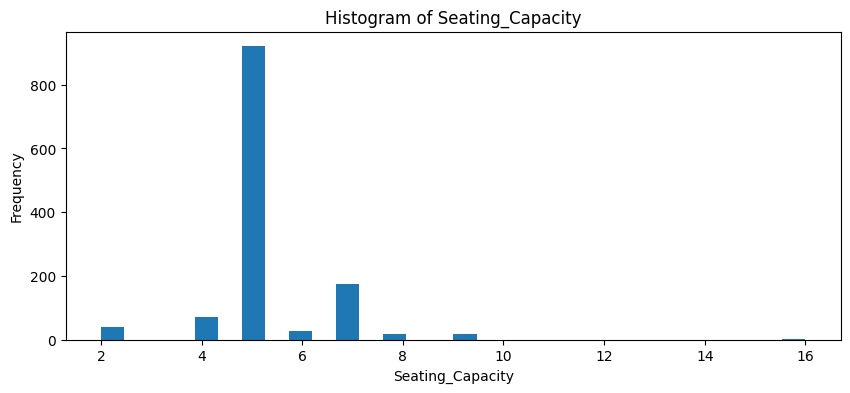

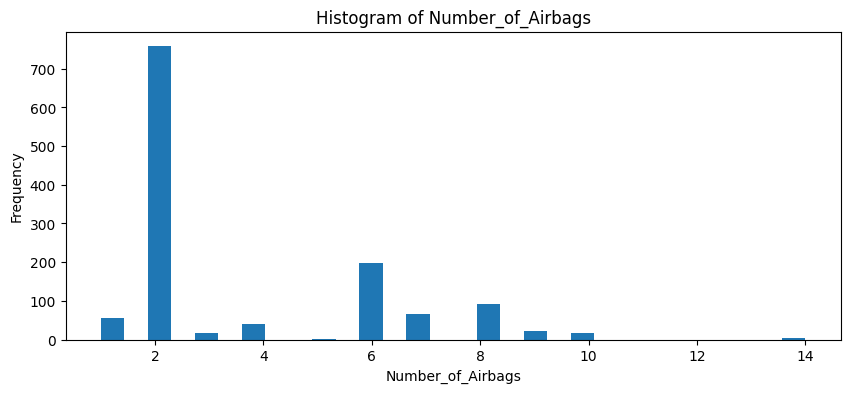

In [16]:
# Plotting histograms for the numerical columns
for column in numerical_cols:
    plt.figure(figsize=(10, 4))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

- The evidence indicates that affordable cars with practical and efficient engine configurations such as 4 cylinder engines with four valves per cylinder are more common.

- The majority of cars are built for typical family use, with five doors and five seats, while there is a discernible demand for cars with seven seats.

- While airbags are a common safety feature, only a small percentage of vehicles appear to have six airbags installed for increased protection.

#### **6. Bar Charts:** Plot bar charts to represent the count of categorical variables (e.g., car models, manufacturers).

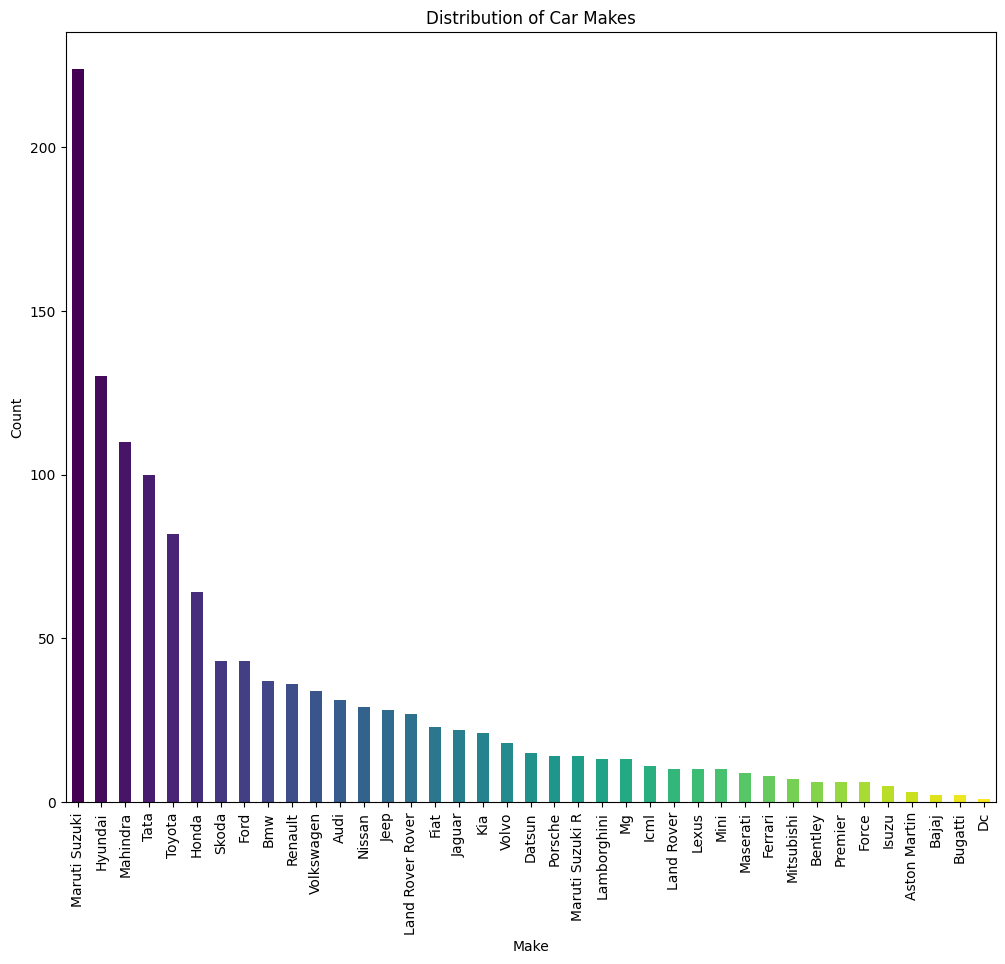

In [17]:
# Create a color map that matplotlib will use to color each bar differently
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Make'].unique())))

# Plotting the bar chart for 'Make'
make_counts = df['Make'].value_counts()
plt.figure(figsize=(12, 10))
make_counts.plot(kind='bar', color=colors)  # Assign colors to each bar
plt.title('Distribution of Car Makes')
plt.ylabel('Count')
plt.xlabel('Make')
plt.show()

- In summary, the market is **dominated by Maruti Suzuki**, with Hyundai and Mahindra also having significant shares. There's a **sharp drop in count as we move to less common makes**, with luxury brands predictably having low representation.

- The diversity of manufacturers is broad, with many makes represented by smaller counts, suggesting a **wide range of options for consumers** in the market.

In [18]:
# Calculating the top 10 most frequent models
most_frequent_models = df['Model'].value_counts().head(10)

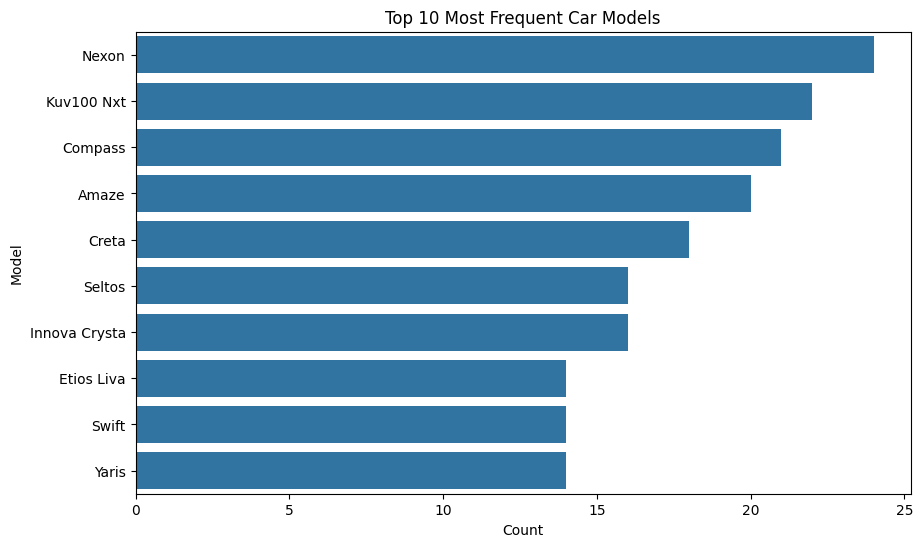

In [19]:
# Creating a bar plot for the top 10 most frequent car models
plt.figure(figsize=(10, 6))
sns.barplot(x=most_frequent_models.values, y=most_frequent_models.index)
plt.title('Top 10 Most Frequent Car Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

- The **Nexon is the most frequent** car model, topping the chart with the highest count.

- The Kuv100 Nxt and Compass follow, with slightly lower counts but still among the top three.

- The **counts gradually decrease from Amaze to Yaris**, indicating a descending order of frequency.

#### **7. Box Plots:** Use box plots to identify outliers and understand the distribution of numeric variables.

In [20]:
# We have already stored numerical columns in a variable named numerical_cols
numerical_cols

Index(['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
       'Doors', 'Seating_Capacity', 'Number_of_Airbags'],
      dtype='object')

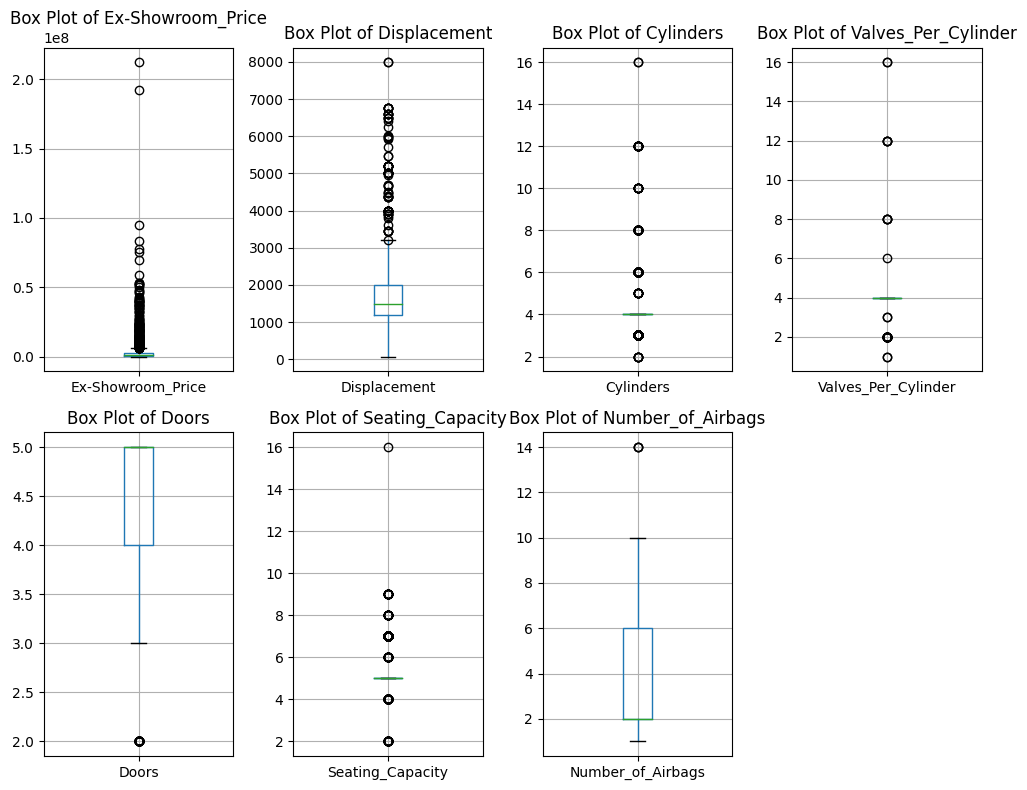

In [21]:
# Create a figure and axis for the box plots
plt.figure(figsize=(10, 8))

# Plot box plots for each numeric variable
for i, var in enumerate(numerical_cols, start=1):
    plt.subplot(2, 4, i)  # Adjust the grid dimensions (2x2) based on your number of variables
    df.boxplot(column=var)
    plt.title(f'Box Plot of {var}')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

- **Ex-Showroom Price:** Most automobiles are grouped in the lower price category, although a handful are much more expensive than the majority, with several outliers falling over this range.

- **Displacement:** There are a **lot of outliers above the upper whisker**, which indicates that **some cars have engines that are significantly larger than the cluster in the middle**.

- **Cylinders:** A small percentage of the vehicles in the sample have a **cylinder count that is noticeably higher than the average**. These are known as the **higher end outliers**.

- **Valves Per Cylinder:** There are a **few anomalies with high numbers of valves per cylinder**, which might be a sign of very efficient engines.

- **Doors:** All data points fall inside the range; there are **no outliers**, suggesting that the number of doors is generally consistent over most vehicles.

- **Seating Capacity:** There are **multiple outliers above the upper whisker**, indicating that **certain cars can seat far more people than the average range**.

- **Number of Airbags:** There are **some higher-end outliers**, indicating that **certain cars have a notably greater airbag count**.


#### **8. Pie Charts:** Represent the contribution of different car models or manufacturers using pie charts.

- Given the potential for a large number of unique car makes and models in the dataset, a pie chart might not be the best choice for visualization, as it can become cluttered or unreadable with too many categories.

Make
Aston Martin         3
Audi                15
Bajaj                1
Bentley              4
Bmw                 13
Bugatti              1
Datsun               2
Dc                   1
Ferrari              6
Fiat                 8
Force                1
Ford                 6
Honda                8
Hyundai             15
Icml                 1
Isuzu                2
Jaguar               5
Jeep                 4
Kia                  2
Lamborghini          3
Land Rover           2
Land Rover Rover     5
Lexus                7
Mahindra            17
Maruti Suzuki       49
Maruti Suzuki R      1
Maserati             5
Mg                   2
Mini                 6
Mitsubishi           3
Nissan               6
Porsche              6
Premier              1
Renault              5
Skoda                7
Tata                14
Toyota              12
Volkswagen           5
Volvo                9
Name: Model, dtype: int64


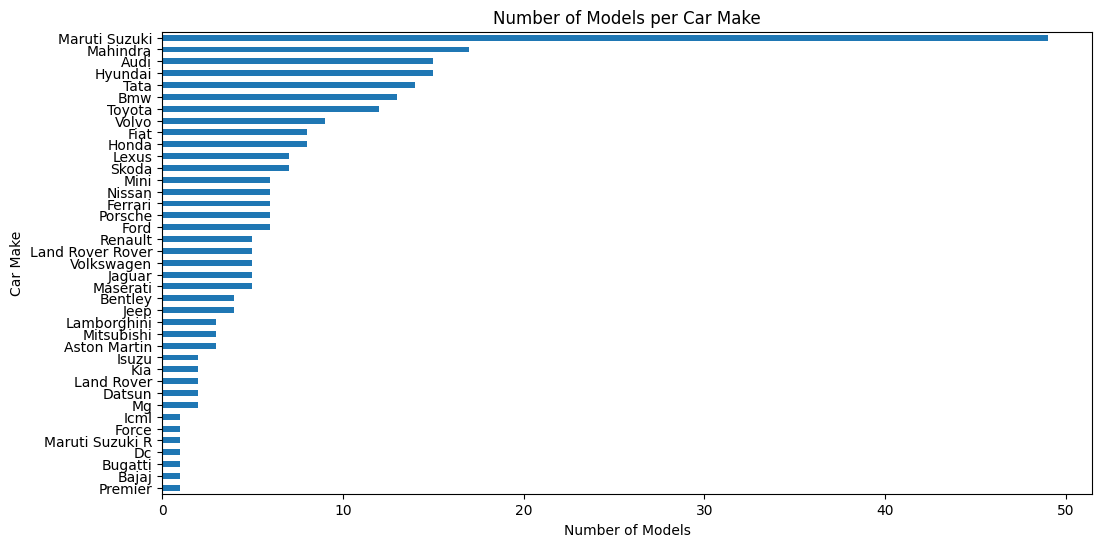

In [22]:
# Using a bar chart to visualize the number of models for each car make
# Counting the number of models for each make
make_model_counts = df.groupby('Make')['Model'].nunique()
print(make_model_counts)
# Plotting a bar chart
plt.figure(figsize=(12, 6))
make_model_counts.sort_values().plot(kind='barh')
plt.xlabel('Number of Models')
plt.ylabel('Car Make')
plt.title('Number of Models per Car Make')
plt.show()


- Maruti Suzuki leads with the highest number of models, approximately 50. Mahindra, Hyundai, and Tata also have a significant number of models, ranging between 20 and 40.

- Several well-known brands like BMW, Toyota, and Honda have a moderate range of 10 to 20 models. Luxury brands like Porsche, Ferrari, and Bentley, as well as some less common brands like Datsun and MG, offer fewer models, under 10.

#### **9. Count Plots:** Visualize the count of observations for categorical variables using count plots.

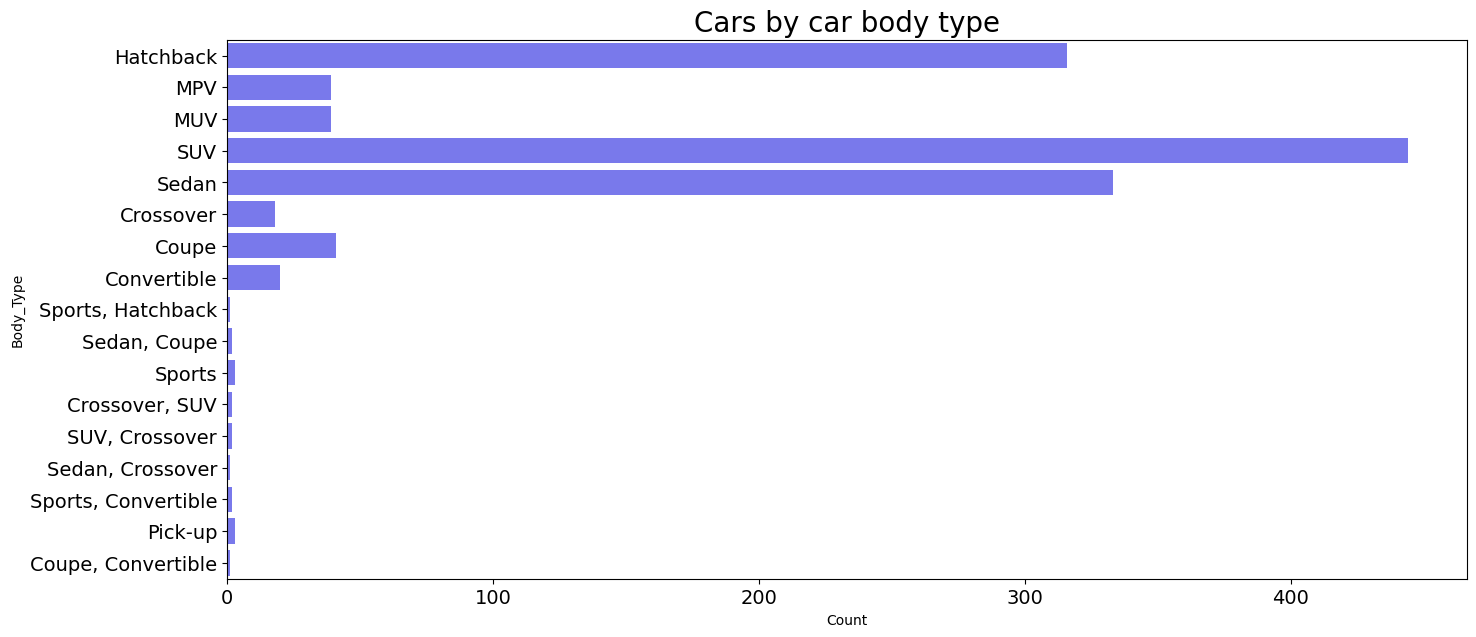

In [23]:
# 1. Cars by car body type
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Count')
plt.ylabel('Body_Type');

- The most common body type appears to be "SUV," followed by "Sedan," which are significantly more common than other types.

- The least common types are various combinations of body types and specific categories like "Convertible" and "Coupe, Convertible".

- There are also entries that combine two categories, such as "SUV, Crossover" and "Sports, Convertible," suggesting a diverse range of car types in the dataset.

- The chart provides a clear visual representation of the distribution of car body types within the dataset.

In [24]:
# 2. Graph of Body Type and Ex-Showroom Price
PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

<ipython-input-24-6b5f04f73d87>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)


- The average 'Ex-Showroom_Price' for various car 'Body_Type' categories is shown in the bar chart. It is clear that, in comparison to other body types, the 'AMC' body type has the highest average ex-showroom price.

- Then come "dune buggy," "grand tourer," and "fastback," all of which have higher average costs than more popular body styles like "Hatchback" and "Sedan."

- The typical lowest priced categories are "Sports Hatchback," "Sedan," and "Crossover." Understanding the average pricing landscape for various car body styles is made easier with the help of this depiction.

<Axes: xlabel='Fuel_Type', ylabel='count'>

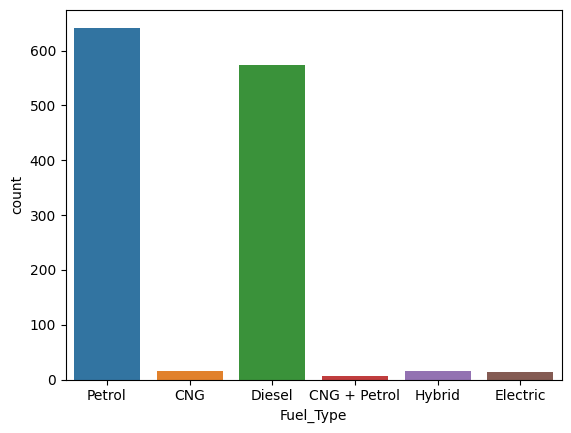

In [25]:
# 3. Cars count by Engine Fuel Type
sns.countplot(df, x = 'Fuel_Type', hue = 'Fuel_Type')

- From the above chart, it appears that petrol is the most consumed fuel in India followed by diesel which comes at a distance second with consumption count around 580.

- On the other hand, electric fuel is the least consumed fuel because of its high cost, insufficient infrastructure in India, and scarcity of high performing EVs. Petrol and diesel are affordable and also high in quantities hence the preference.

   Body_Type  Cylinders Fuel_Type
0  Hatchback       2.00    Petrol
1  Hatchback       2.00    Petrol
2  Hatchback       2.00       CNG
3  Hatchback       2.00    Petrol
4  Hatchback       2.00    Petrol
5  Hatchback       2.00    Petrol
6  Hatchback       3.00    Petrol
7  Hatchback       3.00    Petrol
8  Hatchback       3.00    Petrol
9  Hatchback       3.00    Petrol


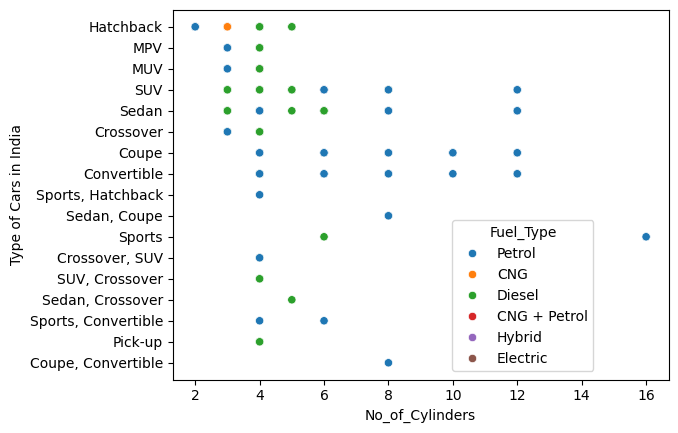

In [26]:
# 4. Type of cars wrt number of cylinders and fuel type
car_fuel_cylinders = df[['Body_Type', 'Cylinders', 'Fuel_Type']]
print(car_fuel_cylinders.head(10))

g = sns.scatterplot(x='Cylinders', y='Body_Type', hue='Fuel_Type', data=car_fuel_cylinders)
plt.xlabel("No_of_Cylinders")
plt.ylabel("Type of Cars in India");
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45), title='Fuel_Type')

- The most frequent body styles for cars are sedans and hatchbacks, and the majority have four or six cylinders.

- Hybrid automobiles, indicated in blue, can have anywhere from four to eight cylinders, while electric cars, indicated in pink, typically have fewer cylinders.

- Orange CNG cars appear to have four cylinders or fewer.


In [27]:
# 5.3D graph of Displacement, Price, and Fuel Tank
fig = px.scatter_3d(df, x='Displacement', z='Ex-Showroom_Price', y='Fuel_Type',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

- Larger displacements are generally associated with higher prices.

- Electric vehicles (in green) show a high price range despite lower displacements, indicating a premium for electric technology.

- Luxury brands like Ferrari, Bentley, and Bugatti (in darker shades) occupy the high-end price spectrum.

- There's a wide price distribution among petrol and diesel cars, suggesting a broad market segment.

- The plot highlights the diversity of the automotive market in terms of make, engine size, fuel type, and price.

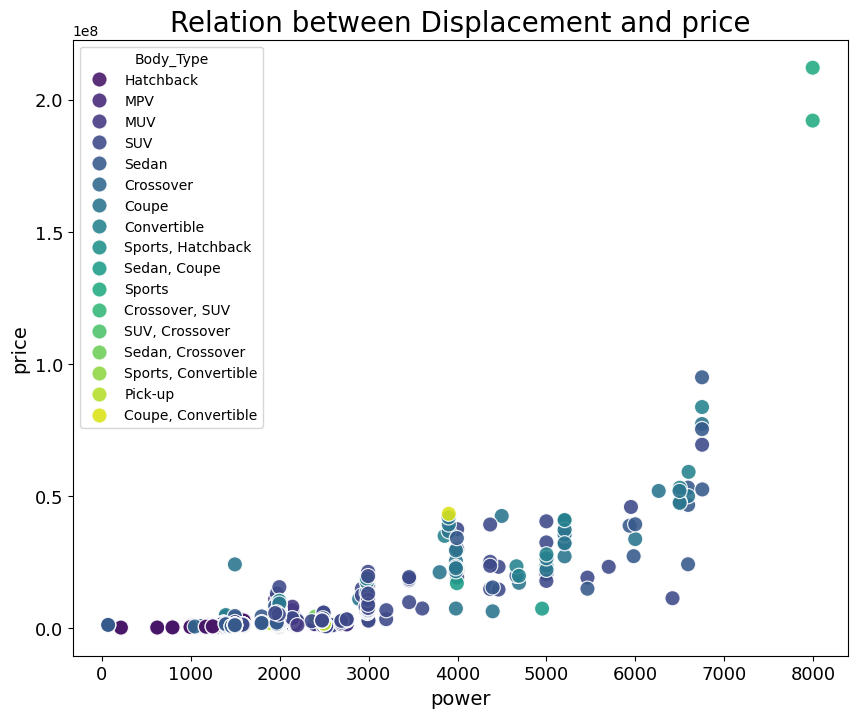

In [28]:
# 6. Relation Between Price and Displacement
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between Displacement and price',fontsize=20);

- It appears that as power increases, the price tends to increase as well, particularly notable in the Coupe, Convertible, and Sports categories, which have points at the higher end of both axes.

- Most vehicle types are clustered in the lower left quadrant, indicating a concentration of less powerful, more affordable vehicles.

- SUVs and Crossovers are spread across a wide range of power and price points, showing diversity within those categories.

- The most expensive vehicles are Coupes and Convertibles with high power, while Hatchbacks, MPVs, and MUVs generally represent the more economical and less powerful segment of the market.

### Bivariate Analysis

#### **1. Correlation Matrix:** Create a correlation matrix to understand the relationships between numeric variables.

In [29]:
# We have already stored numerical columns in a variable named numerical_cols
numerical_cols

Index(['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
       'Doors', 'Seating_Capacity', 'Number_of_Airbags'],
      dtype='object')

In [30]:
# Calculating the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
Ex-Showroom_Price,1.000000,0.794094,0.816932,0.029803,-0.459967,-0.307134,0.337043
Displacement,0.794094,1.000000,0.879435,0.032086,-0.474515,-0.164942,0.537501
Cylinders,0.816932,0.879435,1.000000,-0.001538,-0.501078,-0.313371,0.449824
Valves_Per_Cylinder,0.029803,0.032086,-0.001538,1.000000,-0.028573,-0.023650,0.092162
Doors,-0.459967,-0.474515,-0.501078,-0.028573,1.000000,0.519169,-0.203877
Seating_Capacity,-0.307134,-0.164942,-0.313371,-0.023650,0.519169,1.000000,-0.046742
Number_of_Airbags,0.337043,0.537501,0.449824,0.092162,-0.203877,-0.046742,1.000000


- The data indicates a substantial positive connection between "Ex-Showroom_Price" and "Displacement" and "Cylinders" (0.79 and 0.82, respectively). This suggests that cars with more cylinders and larger engines typically have higher prices.

- "Cylinders" and "Displacement" have a strong positive correlation (0.88), as would be predicted given that larger displacement is typically associated with more cylinders.

- The moderately positive correlation (0.52) between "Doors" and "Seating_Capacity" indicates that cars with more doors typically have larger seating capacity.

- The data indicates a moderate positive connection between "Number_of_Airbags" and "Displacement" and "Cylinders" (0.54 and 0.45, respectively). This suggests that cars with higher displacement and maybe higher quality tend to have more airbags.

- The variable "Doors" exhibits a somewhat negative association with the variables "Ex-Showroom_Price," "Displacement," and "Cylinders." This suggests that cars with higher sticker prices and larger engines may not prioritize having more doors.

- The variable "Valves_Per_Cylinder" exhibits negligible to no association with other variables, indicating that it fluctuates independently of variables such as engine size and price.

#### **2. Scatter Plots:** Plot scatter plots to explore the relationship between two numeric variables (e.g., sales vs. price).

In [31]:
# We have already stored numerical columns in a variable named numerical_cols
numerical_cols

Index(['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
       'Doors', 'Seating_Capacity', 'Number_of_Airbags'],
      dtype='object')

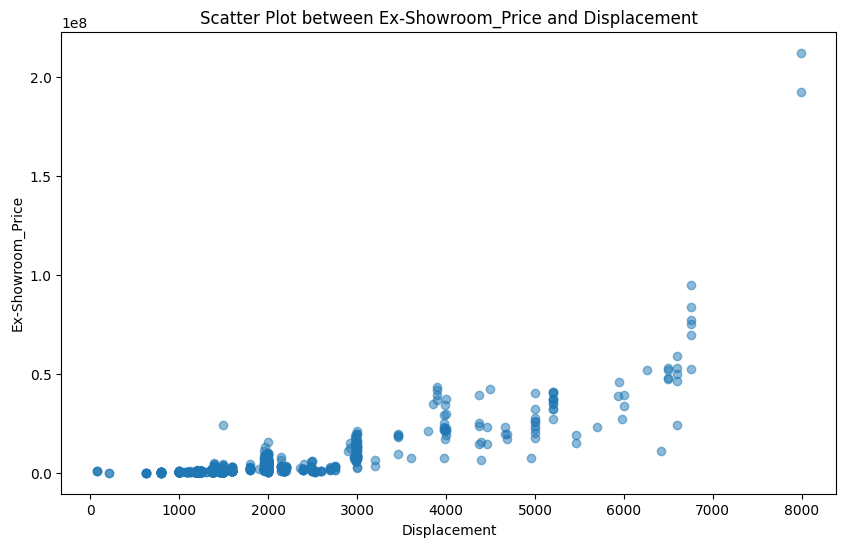

In [32]:
# Creating the scatter plot on Ex-Showroom_Price and Displacement
plt.figure(figsize=(10, 6))
plt.scatter(df['Displacement'], df['Ex-Showroom_Price'], alpha=0.5)
plt.title('Scatter Plot between Ex-Showroom_Price and Displacement')
plt.xlabel('Displacement')
plt.ylabel('Ex-Showroom_Price')
plt.show()

- There is a cluster of cars with low displacement that are priced lower.

- As displacement increases, there is a general trend towards higher prices, with some high-displacement cars having very high prices.

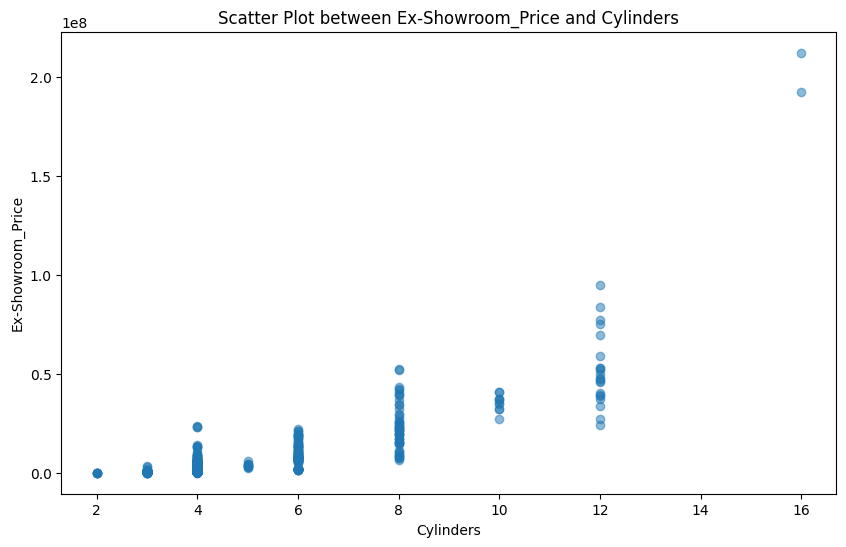

In [33]:
# Creating the scatter plot on Ex-Showroom_Price and Cylinders
plt.figure(figsize=(10, 6))
plt.scatter(df['Cylinders'], df['Ex-Showroom_Price'], alpha=0.5)
plt.title('Scatter Plot between Ex-Showroom_Price and Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Ex-Showroom_Price')
plt.show()

- Cars with more cylinders tend to be priced higher, which is consistent with the idea that more cylinders typically indicate a more powerful engine, which can drive up cost.

- There is a wide price range among cars with 4 to 8 cylinders, while those with more than 8 cylinders are consistently high-priced.

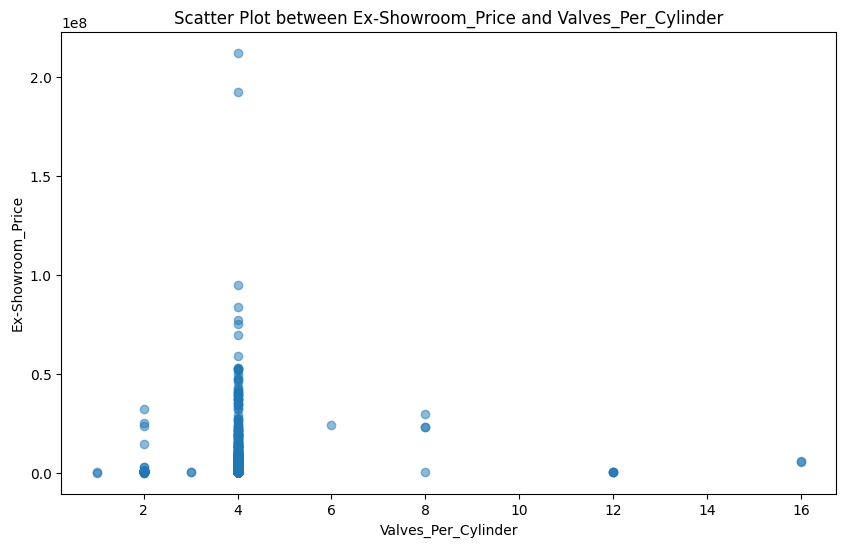

In [34]:
# Creating the scatter plot on Ex-Showroom_Price and Valves_Per_Cylinder
plt.figure(figsize=(10, 6))
plt.scatter(df['Valves_Per_Cylinder'], df['Ex-Showroom_Price'], alpha=0.5)
plt.title('Scatter Plot between Ex-Showroom_Price and Valves_Per_Cylinder')
plt.xlabel('Valves_Per_Cylinder')
plt.ylabel('Ex-Showroom_Price')
plt.show()

- The relationship is not as clear, but there is a slight indication that cars with more valves per cylinder have a higher price range.

- The data points are largely concentrated around cars with 4 valves per cylinder, which is common in modern cars.

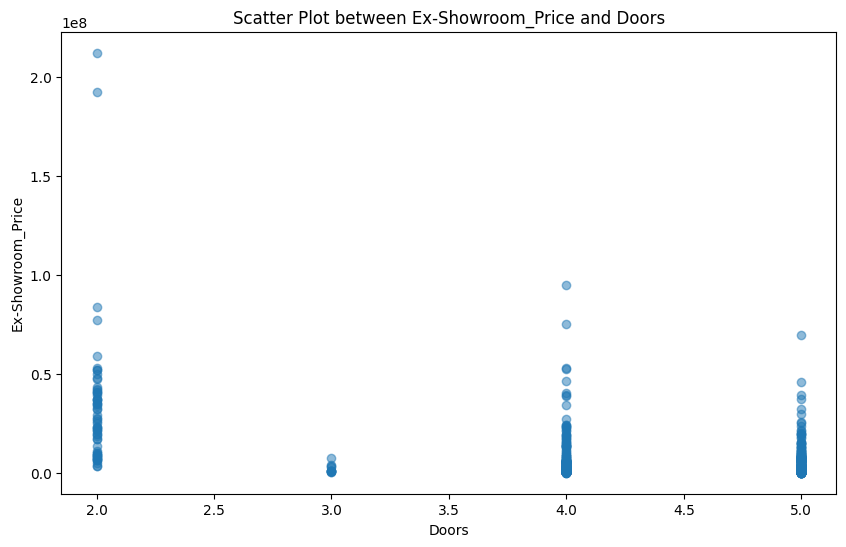

In [35]:
# Creating the scatter plot on Ex-Showroom_Price and Doors
plt.figure(figsize=(10, 6))
plt.scatter(df['Doors'], df['Ex-Showroom_Price'], alpha=0.5)
plt.title('Scatter Plot between Ex-Showroom_Price and Doors')
plt.xlabel('Doors')
plt.ylabel('Ex-Showroom_Price')
plt.show()

- The number of doors does not show a clear relationship with the ex-showroom price, as the prices are quite spread out across cars with different numbers of doors.

- There are expensive cars with both a high and low number of doors.

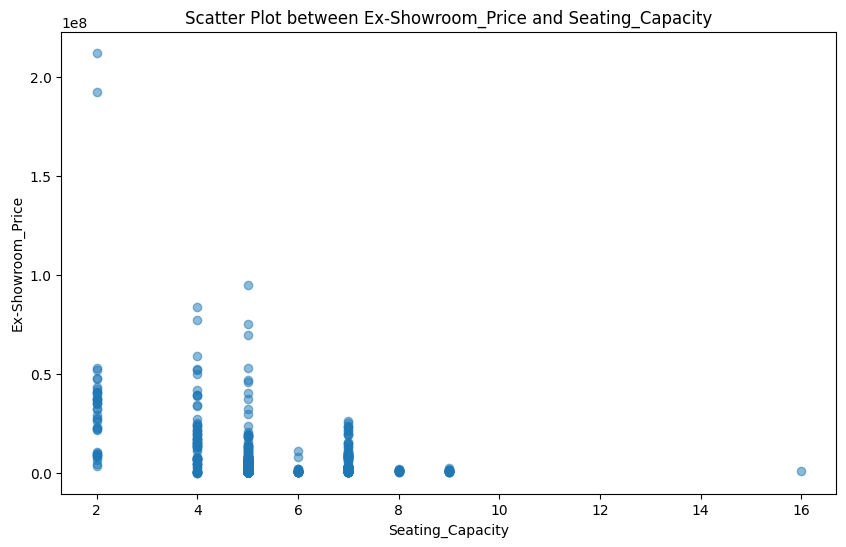

In [36]:
# Creating the scatter plot on Ex-Showroom_Price and Seating_Capacity
plt.figure(figsize=(10, 6))
plt.scatter(df['Seating_Capacity'], df['Ex-Showroom_Price'], alpha=0.5)
plt.title('Scatter Plot between Ex-Showroom_Price and Seating_Capacity')
plt.xlabel('Seating_Capacity')
plt.ylabel('Ex-Showroom_Price')
plt.show()

- No clear trend is observed between seating capacity and ex-showroom price.

- Cars with higher seating capacity do not necessarily have higher prices.

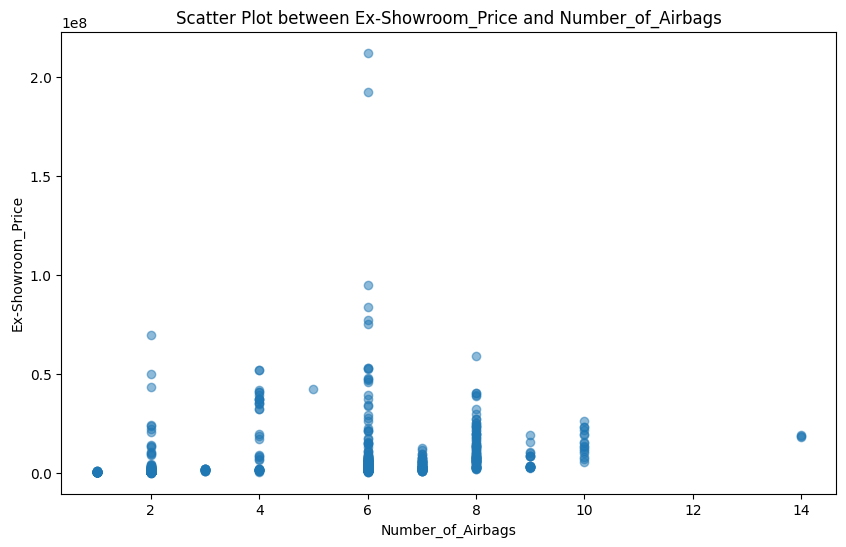

In [37]:
# Creating the scatter plot on Ex-Showroom_Price and Number_of_Airbags
plt.figure(figsize=(10, 6))
plt.scatter(df['Number_of_Airbags'], df['Ex-Showroom_Price'], alpha=0.5)
plt.title('Scatter Plot between Ex-Showroom_Price and Number_of_Airbags')
plt.xlabel('Number_of_Airbags')
plt.ylabel('Ex-Showroom_Price')
plt.show()

- There seems to be a slight positive relationship, where cars with more airbags tend to have a higher price range.

- This suggests that safety features, like the number of airbags, may contribute to a higher price.

#### **3. Pair Plots:** Use pair plots for a quick overview of relationships between multiple numeric variables.

In [38]:
# We have already stored numerical columns in a variable named numerical_cols
numerical_cols

Index(['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
       'Doors', 'Seating_Capacity', 'Number_of_Airbags'],
      dtype='object')

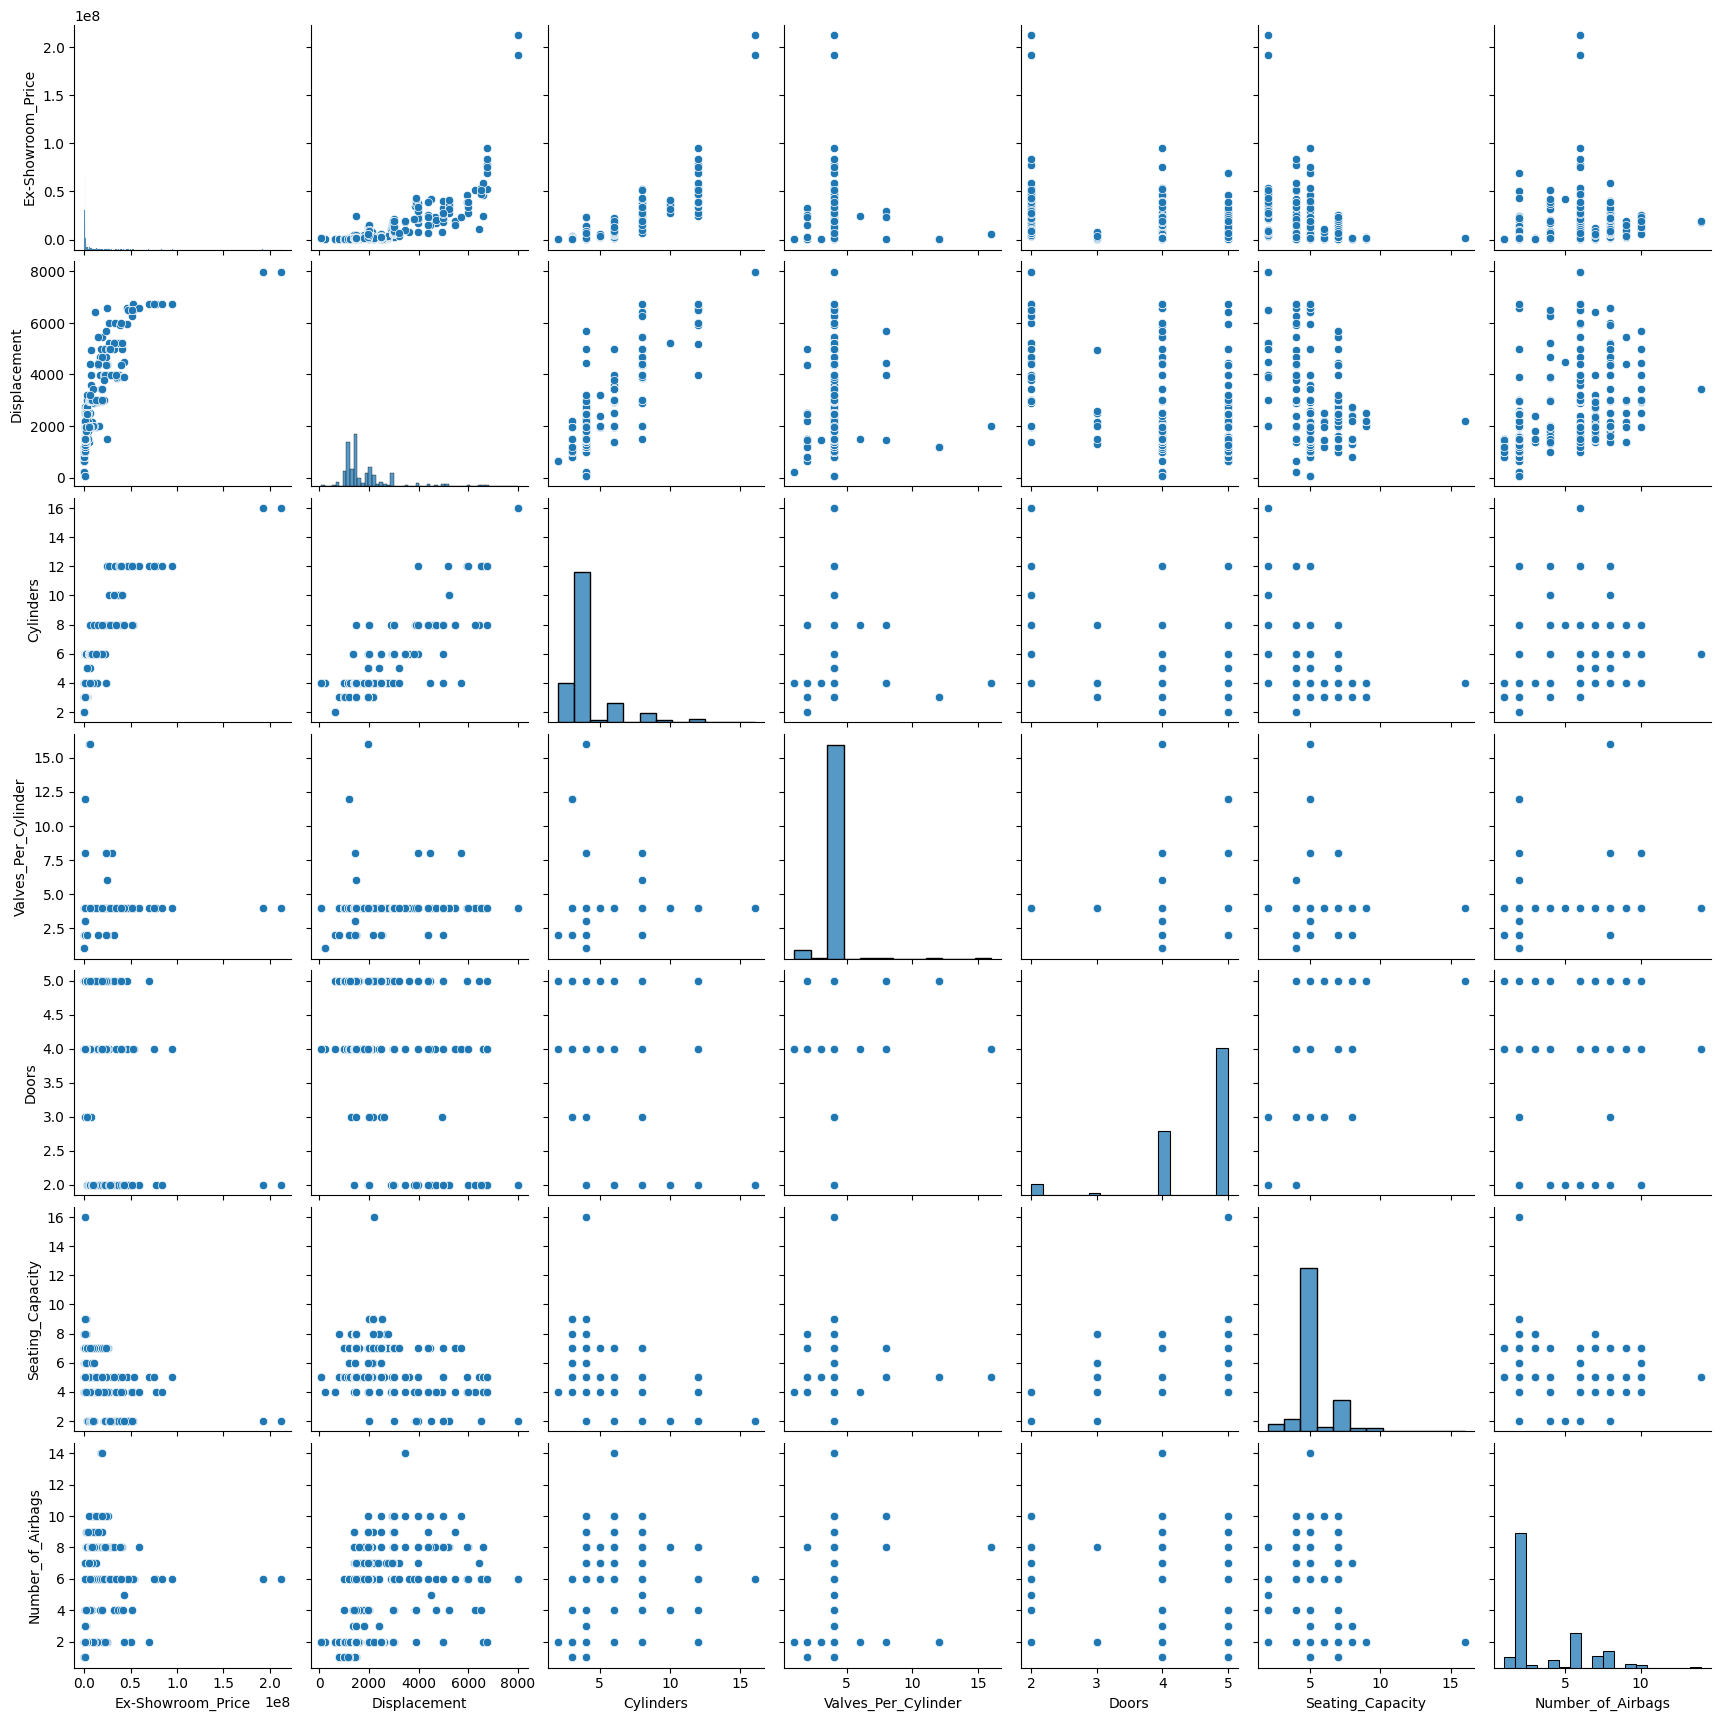

In [39]:
# Select only numeric columns for the pair plot
numeric_columns = df.select_dtypes(include=['number'])

# Plotting the pair plot using Seaborn
sns.pairplot(numeric_columns)

# Display the plot
plt.show()

- The scatter plots of "Ex-Showroom_Price" vs "Displacement" and "Cylinders" demonstrate a positive trend, suggesting that the ex-showroom price tends to rise in parallel with displacement and cylinder count increases. This implies that a vehicle's cost is mostly determined by the size and complexity of its engine.

- Though with a larger spread, the scatter plot between "Number_of_Airbags" and "Ex-Showroom_Price" likewise demonstrates a positive trend. This suggests that vehicles with more airbags typically have higher prices, which may point to a relationship between the cost and safety features of vehicles.

#### **4. Bar Charts with Hue:** Enhance bar charts by introducing the 'hue' parameter to represent additional categorical variables.

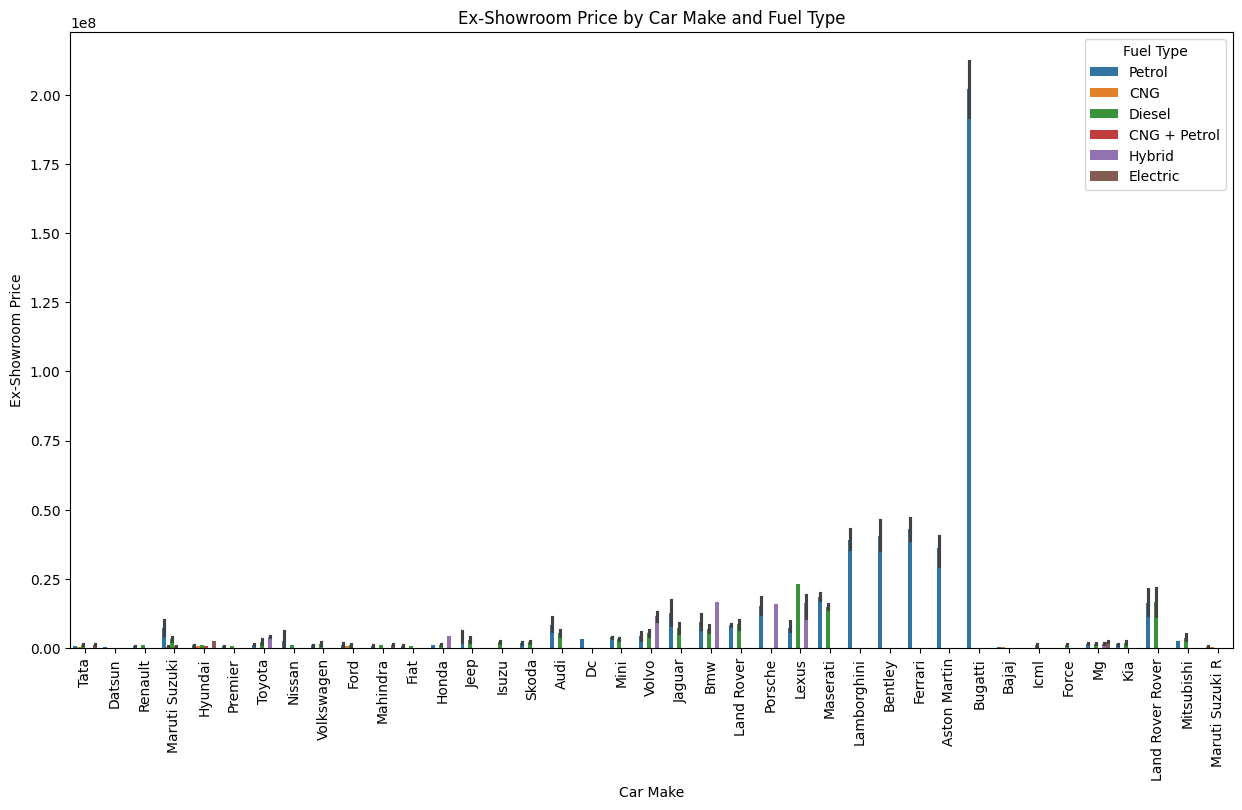

In [40]:
# Let's say 'Make' is the main categorical variable,
# 'Ex-Showroom_Price' is the numeric variable,
# and 'Fuel_Type' is the additional categorical variable we want to use as hue.

plt.figure(figsize=(15, 8))
sns.barplot(
    data=df,
    x='Make',  # Replace with your actual categorical column name
    y='Ex-Showroom_Price',  # Replace with your actual numeric column name
    hue='Fuel_Type'  # Replace with your actual hue categorical column name
)
plt.title('Ex-Showroom Price by Car Make and Fuel Type')
plt.xticks(rotation=90)
plt.ylabel('Ex-Showroom Price')
plt.xlabel('Car Make')
plt.legend(title='Fuel Type')
plt.show()


- The graph shows that, on average, electric cars cost more than their conventional fuel-powered different forms, while there are a few outliers with very high pricing.

- Conventional fuel types are primarily found in the lower price ranges, with gasoline being the most often used fuel in all auto manufacturers. Other fuel kinds include diesel and CNG.

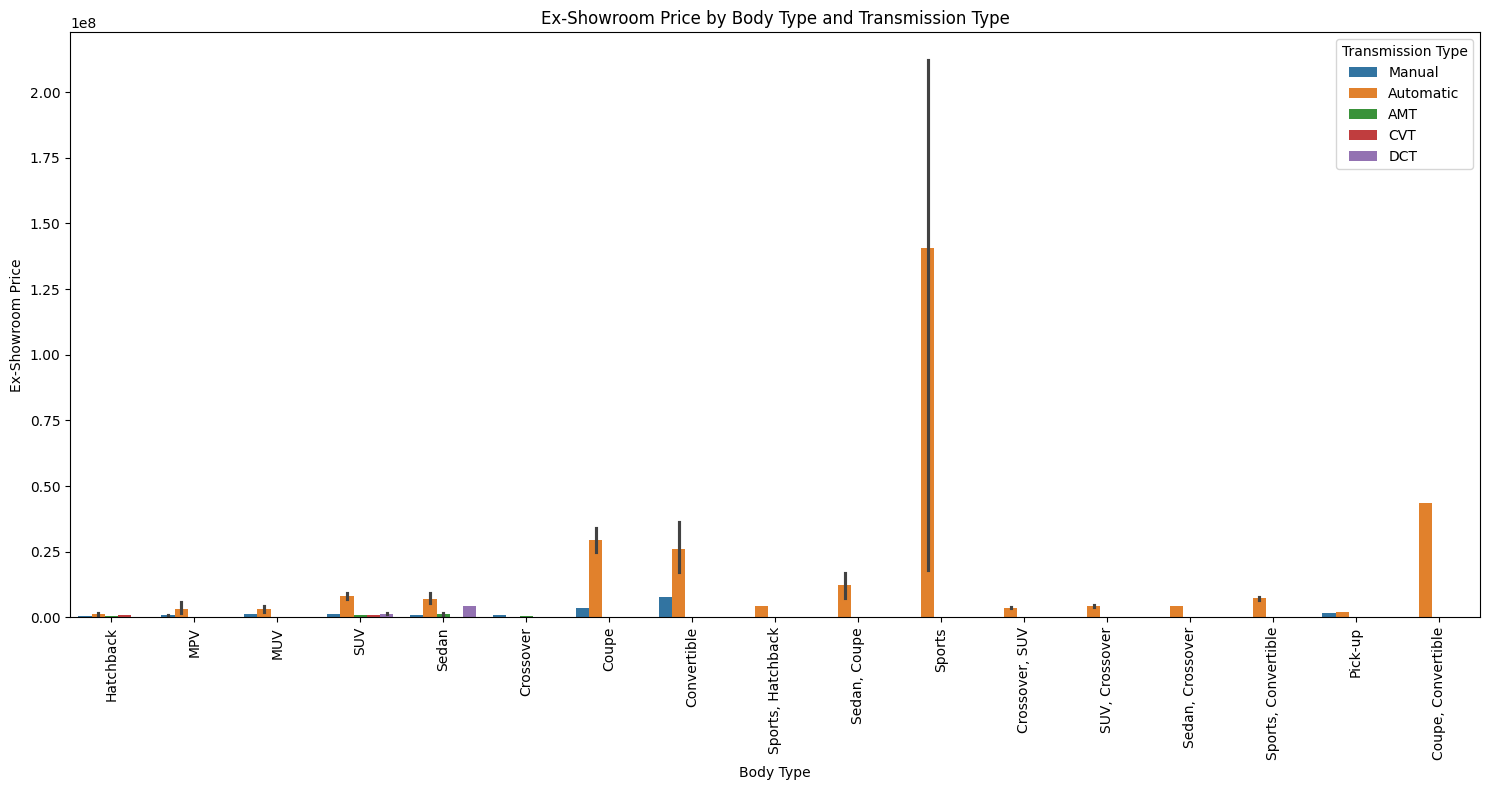

In [41]:
# Dataset contains 'Body_Type', 'Ex-Showroom_Price', and 'Type' columns.

plt.figure(figsize=(15, 8))
sns.barplot(
    data=df,
    x='Body_Type',  # Replace with your actual categorical column name for body type
    y='Ex-Showroom_Price',  # Replace with your actual numeric column name for price
    hue='Type'  # Replace with your actual categorical column name for transmission
)
plt.title('Ex-Showroom Price by Body Type and Transmission Type')
plt.xticks(rotation=90)
plt.ylabel('Ex-Showroom Price')
plt.xlabel('Body Type')
plt.legend(title='Transmission Type')
plt.tight_layout()  # Adjust the layout
plt.show()

- The second graph shows that vehicles with DCT (Dual Clutch Transmission) and automatic transmissions command higher prices, particularly noticeable in the sports body type, which shows a high price peak.

- Manual and AMT (Automated Manual Transmission) vehicles generally occupy the lower price range. CVT (Continuously Variable Transmission) vehicles are spread across a moderate price range.

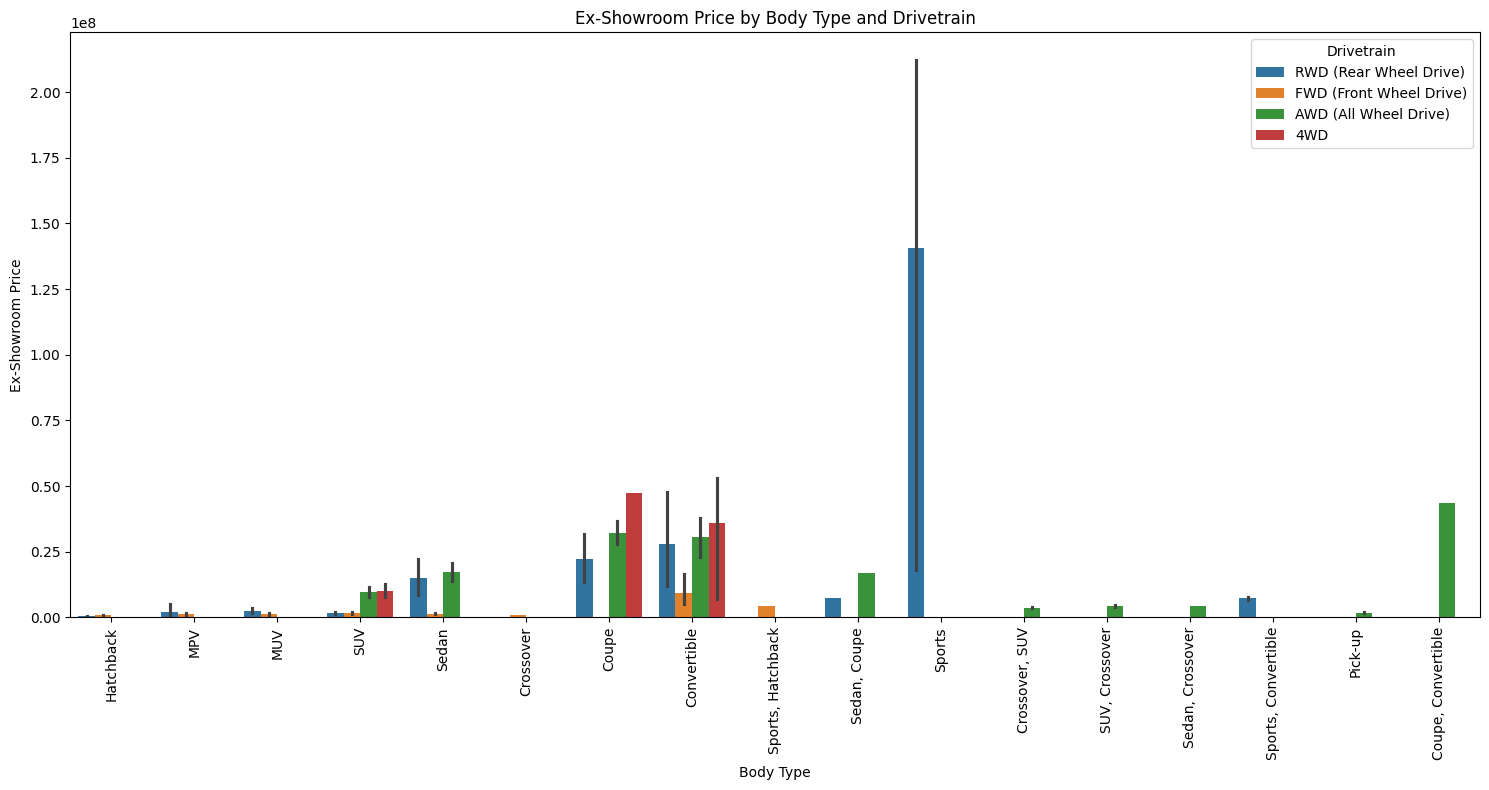

In [42]:
# Dataset contains 'Body_Type', 'Ex-Showroom_Price', and 'Drivetrain' columns.

plt.figure(figsize=(15, 8))
sns.barplot(
    data=df,
    x='Body_Type',  # Replace with your actual categorical column name for body type
    y='Ex-Showroom_Price',  # Replace with your actual numeric column name for price
    hue='Drivetrain'  # Replace with your actual categorical column name for transmission
)
plt.title('Ex-Showroom Price by Body Type and Drivetrain')
plt.xticks(rotation=90)
plt.ylabel('Ex-Showroom Price')
plt.xlabel('Body Type')
plt.legend(title='Drivetrain')
plt.tight_layout()  # Adjust the layout
plt.show()

- The most expensive cars typically include 4WD (four-wheel drive) drivetrains, especially in the sports and convertible body styles.

- Vehicles with AWD (all-wheel drive) can be purchased for a wide range of budgets, from cheap to expensive.

- With a few exceptions in the sports segment, vehicles with front-wheel drive (FWD) and rear-wheel drive (RWD) are more prevalent in the lower to mid-price range.

#### **5. Heatmaps:** Utilize heatmaps to visually represent the correlation matrix for better insights.

In [43]:
# We have already stored numerical data in a variable named numeric_columns
numeric_columns

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,292667,624.00,2.00,2.00,5.00,4.00,2.00
1,236447,624.00,2.00,2.00,5.00,4.00,2.00
2,296661,624.00,2.00,2.00,4.00,4.00,2.00
3,334768,624.00,2.00,2.00,5.00,4.00,2.00
4,272223,624.00,2.00,2.00,5.00,4.00,2.00
...,...,...,...,...,...,...,...
1271,1302000,1498.00,4.00,4.00,4.00,5.00,2.00
1272,1421000,1498.00,4.00,4.00,4.00,5.00,6.00
1273,1431000,1497.00,4.00,4.00,4.00,5.00,6.00
1274,1201000,1497.00,4.00,4.00,4.00,5.00,2.00


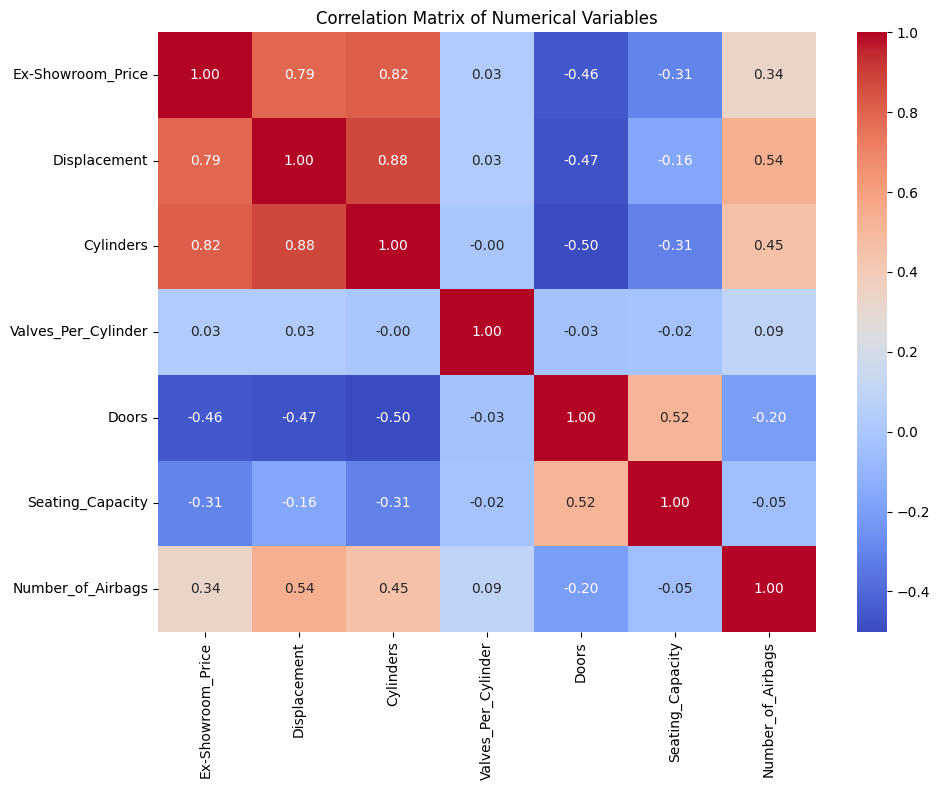

In [44]:
# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

#### **6. Joint Plots:** Use joint plots to display the distribution of two numeric variables and their relationship.

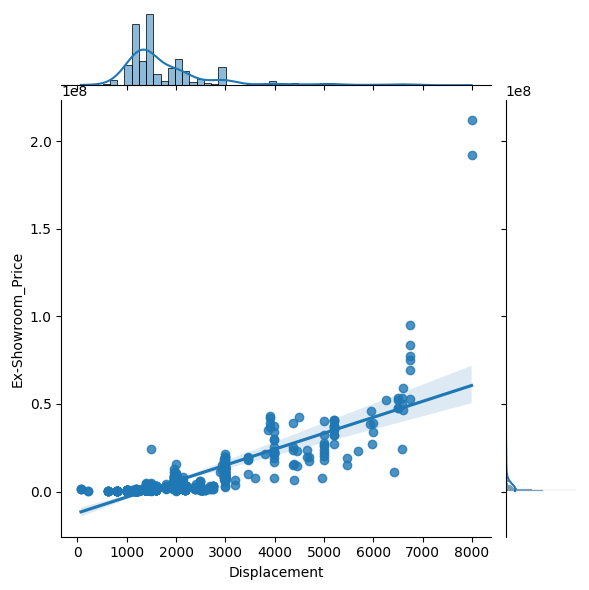

In [45]:
# Jointplot for 'Ex-Showroom_Price' and 'Displacement'
joint1 = sns.jointplot(
    data=df,
    x='Displacement',
    y='Ex-Showroom_Price',
    kind='reg'  # Change kind to 'reg' if you want a regression line
)
plt.show()

- There is a positive correlation showing that vehicles with larger displacement engines generally have higher prices. The histogram on the top shows a more uniform distribution of prices compared to the first graph, but with a slight right skew.

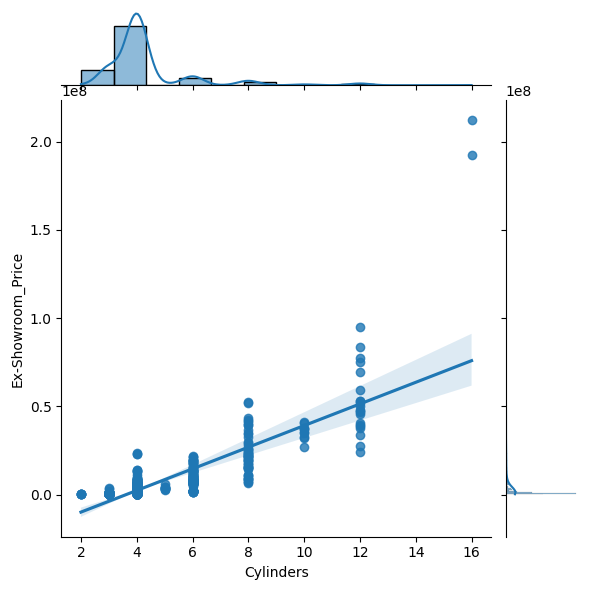

In [46]:
# Jointplot for 'Ex-Showroom_Price' and 'Cylinders'
sns.jointplot(
    data=df,
    x='Cylinders',
    y='Ex-Showroom_Price',
    kind='reg'
)
plt.show()


- There is a positive trend indicating that vehicles with more cylinders tend to have higher prices. The histogram on the top suggests a right-skewed distribution of prices, with most vehicles concentrated in the lower price range.

#### **7. Box Plots with Hue:** Enhance box plots by introducing the 'hue' parameter to represent additional categorical variables.

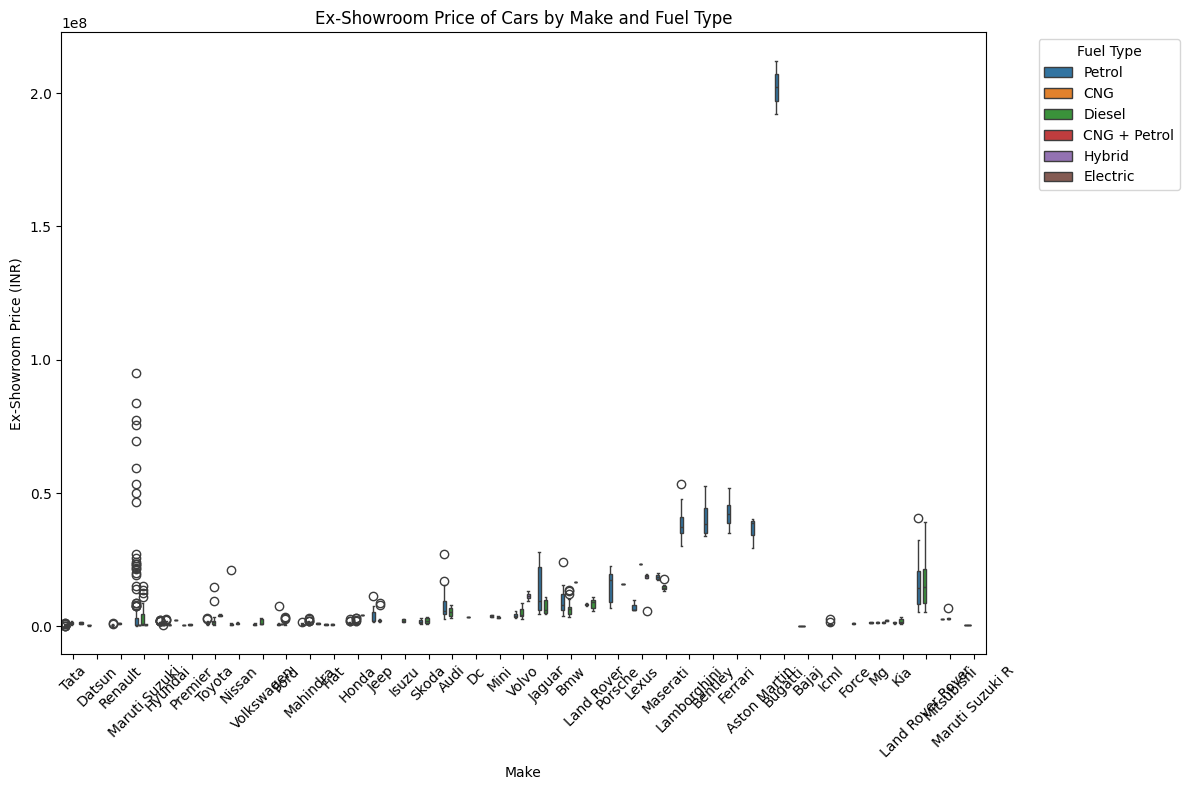

In [47]:
# Now, let's create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    x='Make',
    y='Ex-Showroom_Price',
    hue='Fuel_Type'
)

# Improve the readability of the plot
plt.xticks(rotation=45)
plt.title('Ex-Showroom Price of Cars by Make and Fuel Type')
plt.xlabel('Make')
plt.ylabel('Ex-Showroom Price (INR)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

- The plot reveals a wide range of prices across different makes, with some luxury brands exhibiting a higher median price, especially for electric vehicles.

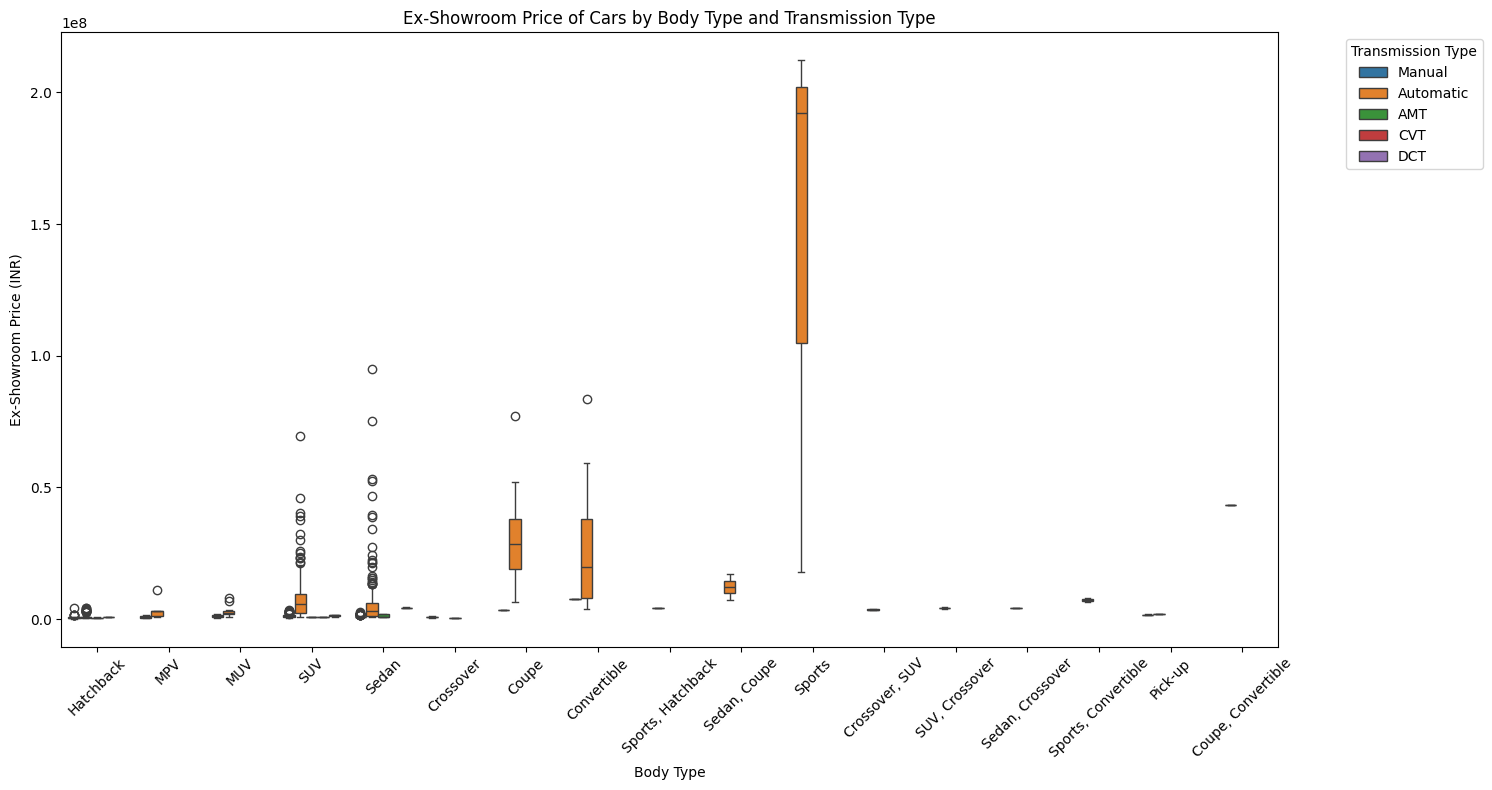

In [48]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=df,
    x='Body_Type',
    y='Ex-Showroom_Price',
    hue='Type'
)

# Improve the readability of the plot
plt.xticks(rotation=45)
plt.title('Ex-Showroom Price of Cars by Body Type and Transmission Type')
plt.xlabel('Body Type')
plt.ylabel('Ex-Showroom Price (INR)')
plt.legend(title='Transmission Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

- The variation in prices across body types is evident, with sports cars and convertibles generally being more expensive. Additionally, the color coding by transmission type suggests that cars with DCT (Dual Clutch Transmission) generally fall into a higher price bracket, which is particularly noticeable in certain body types like SUVs and crossovers.

#### **8. Categorical Plots:** Explore relationships between categorical and numeric variables using categorical plots.

<Figure size 1500x600 with 0 Axes>

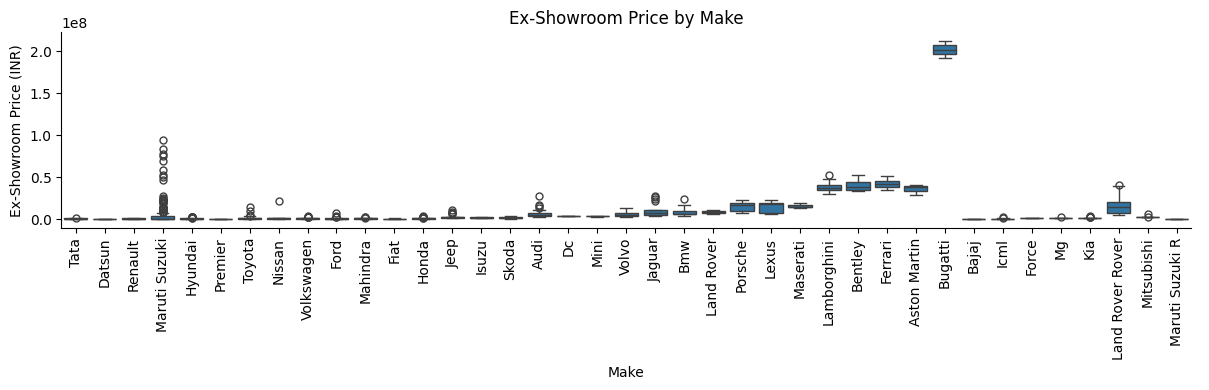

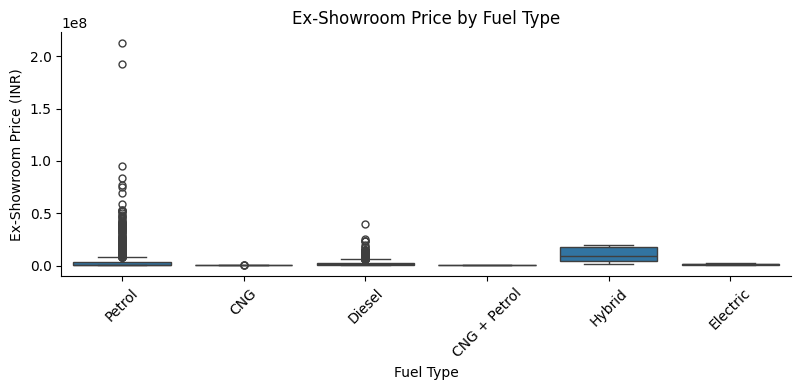

In [49]:
# Create a box plot for 'Make' vs 'Ex-Showroom_Price'
plt.figure(figsize=(15, 6))
sns.catplot(x='Make', y='Ex-Showroom_Price', kind='box', data=df, height=4, aspect=3)
plt.xticks(rotation=90)
plt.title('Ex-Showroom Price by Make')
plt.xlabel('Make')
plt.ylabel('Ex-Showroom Price (INR)')
plt.tight_layout()

# Create a box plot for 'Fuel_Type' vs 'Ex-Showroom_Price'
sns.catplot(x='Fuel_Type', y='Ex-Showroom_Price', kind='box', data=df, height=4, aspect=2)
plt.xticks(rotation=45)
plt.title('Ex-Showroom Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Ex-Showroom Price (INR)')
plt.tight_layout()

plt.show()

- There is a greater variety of prices and higher median costs for luxury brands like Lamborghini, Bentley, and Ferrari, which suggests that these manufacturers have a more expensive lineup. Numerous low-price outliers for brands like Tata and Datsun indicate that they typically provide more reasonably priced solutions.

- In contrast to gasoline and diesel automobiles, which have lower median costs and more outliers, suggesting a broad range in prices, electric vehicles have a higher median price and less price fluctuation. Additionally, the median price of hybrid cars is higher than that of conventional fuel types, with fewer outliers.


#### **9. Violin Plots:** Visualize the distribution of numeric variables across different categories using violin plots.

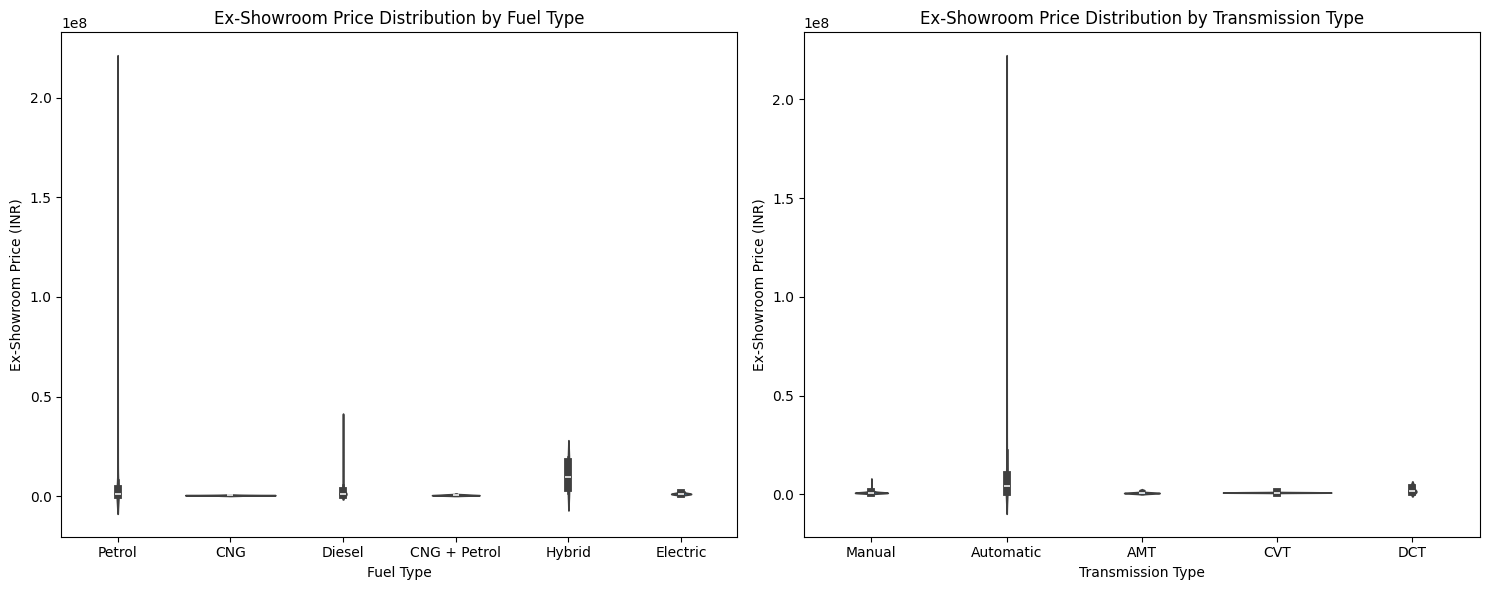

In [50]:
# Setting up the figure for multiple subplots
plt.figure(figsize=(15, 6))

# Violin plot for 'Ex-Showroom_Price' across 'Fuel_Type'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.violinplot(x='Fuel_Type', y='Ex-Showroom_Price', data=df)
plt.title('Ex-Showroom Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Ex-Showroom Price (INR)')

# Violin plot for 'Ex-Showroom_Price' across 'Transmission_Type'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.violinplot(x='Type', y='Ex-Showroom_Price', data=df)
plt.title('Ex-Showroom Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Ex-Showroom Price (INR)')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


- **Fuel Type:** Petrol and Diesel vehicles show a broad range of prices, with a denser concentration at the lower price range.

- Hybrid and Electric vehicles exhibit higher price points, which may reflect the premium pricing of these more technologically advanced or newer models.

- **Transmission Type:** Manual and Automatic transmissions show a similar distribution, with a concentration in the lower price range, indicating a wide availability of options at various price points.

- AMT (Automated Manual Transmission), CVT (Continuously Variable Transmission), and DCT (Dual Clutch Transmission) vehicles have a more narrow distribution, which might suggest less variety in pricing or fewer models available with these transmission types.

#### **10. Stacked Bar Charts:** Represent the combined contribution of different categories using stacked bar charts.

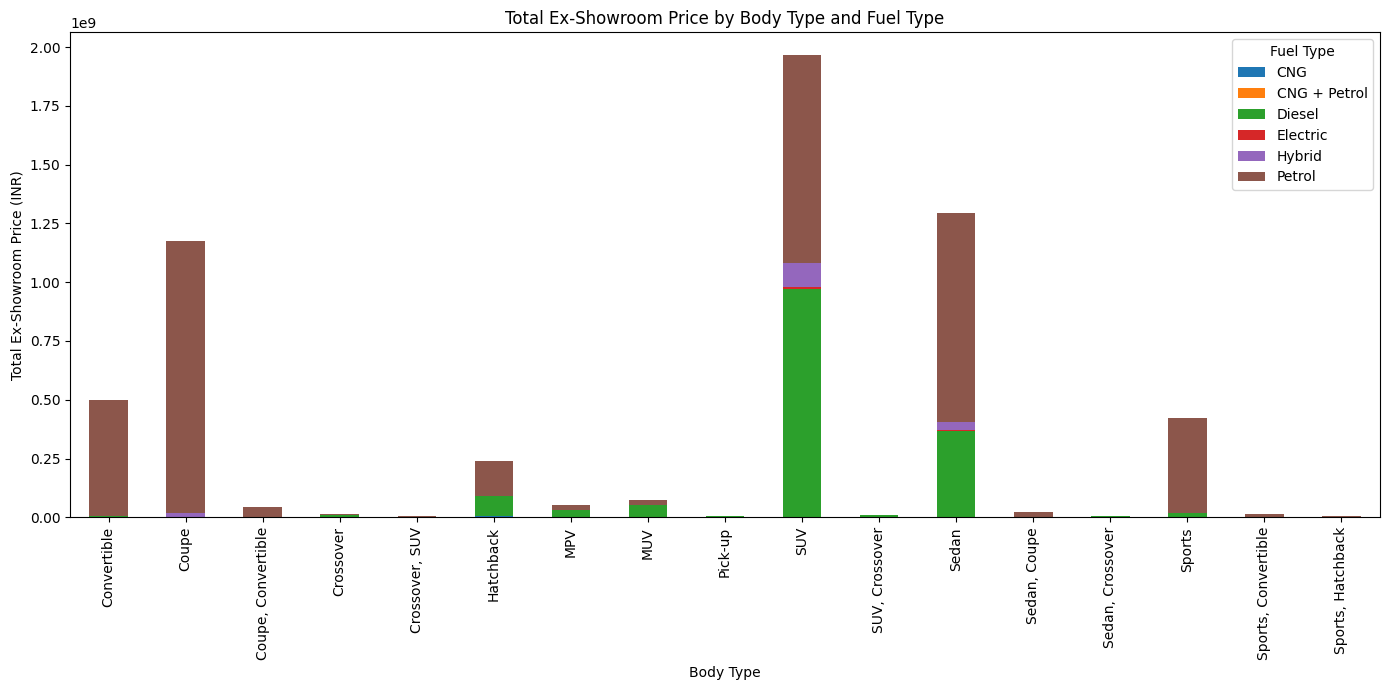

In [51]:
# Group the data by 'Body_Type' and 'Fuel_Type', and then sum the 'Ex-Showroom_Price' for each group
grouped = df.groupby(['Body_Type', 'Fuel_Type'])['Ex-Showroom_Price'].sum().reset_index()

# Pivot the grouped data to create columns for each 'Fuel_Type'
pivot_data = grouped.pivot(index='Body_Type', columns='Fuel_Type', values='Ex-Showroom_Price').fillna(0)

# Create the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 7))

# Adding titles and labels
plt.title('Total Ex-Showroom Price by Body Type and Fuel Type')
plt.xlabel('Body Type')
plt.ylabel('Total Ex-Showroom Price (INR)')
plt.legend(title='Fuel Type')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


- The most expensive total ex-showroom price is found for sedan and SUV body styles, indicating that these are more expensive or in-demand categories.

- Diesel fuel is significantly more prevalent, especially in the SUV class, suggesting that certain body types prefer or have more access to diesel.

- Particularly in the sedan class, hybrid and electric cars also significantly increase the ex-showroom price of the vehicle, which may be a reflection of the industry's move toward more environmentally friendly technology.

- The total ex-showroom prices for other body styles, such as hatchbacks, coupes, and convertibles, are lower. This could be because there are less models in the dataset or because the prices per unit are lower.

#### **11. Insights and Documentation:** Document key findings and insights obtained from both univariate and bivariate analyses.

- Key findings from the univariate analysis reveal that affordable cars with practical engine configurations are common, with a dominance of four-cylinder engines and five-door, five-seat configurations. Safety features such as airbags vary, with a smaller percentage of cars having six airbags.

- Bivariate analysis highlights strong positive correlations between a car's ex-showroom price and its displacement and cylinder count.

- Cars with more cylinders and larger engines generally have higher prices.

- There's also a moderate positive correlation between the number of doors and seating capacity.

- Interestingly, the number of valves per cylinder shows minimal association with other variables, indicating independent variation from factors like engine size and price.

- The analysis provides a comprehensive understanding of the relationships and distributions within the dataset, particularly focusing on factors influencing car prices and configurations.